In [1]:
"""Import libraries. Import data."""
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import torch

DATA_PATH = "../../data/"

data_trn = torch.load(DATA_PATH + "embeddings/exp_00b_trn_embeddings.pt")
data_val = torch.load(DATA_PATH + "embeddings/exp_00c_val_embeddings.pt")

labels_trn = pd.read_csv(DATA_PATH + "csvs/fewshot_trn_labels.csv")
labels_val = pd.read_csv(DATA_PATH + "csvs/fewshot_val_labels.csv")

TOPICS = ["Dance", "Couple Romance", "Heartbreak Romance", "Memes", "Pranks"]
CODES = [0,1,2,3,4]

<Axes: >

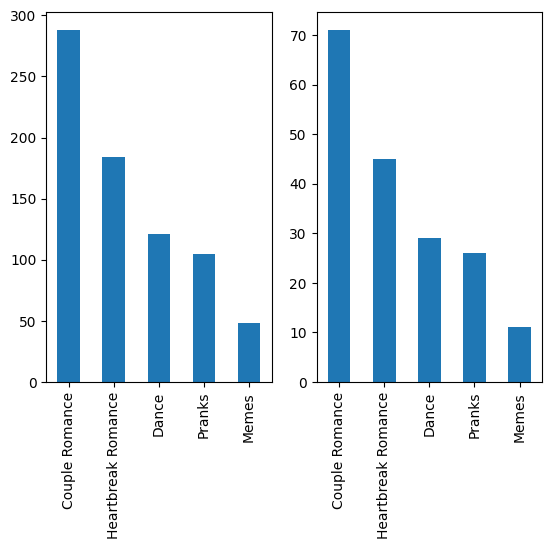

In [2]:
"""Distribution of labels."""
fig, ax = plt.subplots(1,2)
labels_trn['Topic'].value_counts().plot(ax=ax[0], kind='bar')
labels_val['Topic'].value_counts().plot(ax=ax[1], kind='bar')

In [3]:
"""Get x_trn, y_trn, x_val, y_val."""
x_trn = data_trn['embeddings'].numpy()
x_val = data_val['embeddings'].numpy()
y_trn = []
y_val = []

# There should be a more elegant way to do this.
# But, now is not the time.
labels_trn["Topic"].replace(to_replace=TOPICS, value=CODES, inplace=True)
for filename in data_trn["filenames"]:
    post_idx = int(filename.split(".")[0])
    y_trn.append(labels_trn[labels_trn['PostIndex'] == post_idx]['Topic'].values[0])

labels_val["Topic"].replace(to_replace=TOPICS, value=CODES, inplace=True)
for filename in data_val["filenames"]:
    post_idx = int(filename.split(".")[0])
    y_val.append(labels_val[labels_val['PostIndex'] == post_idx]['Topic'].values[0])

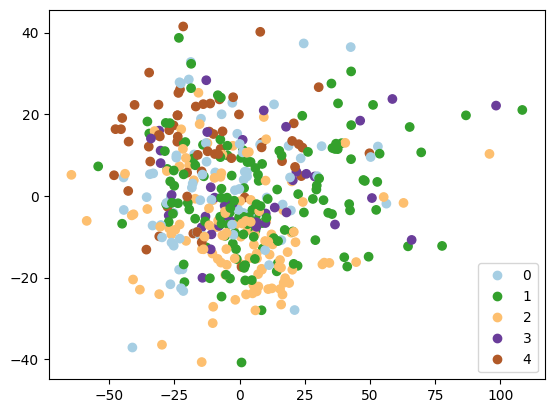

In [4]:
"""PCA on train data."""
fig, ax = plt.subplots()
pca_x_trn = PCA(n_components=2).fit_transform(x_trn)
scatter = ax.scatter(pca_x_trn[:, 0], pca_x_trn[:, 1],
                     c=y_trn, cmap=plt.cm.Paired)
ax.legend(*scatter.legend_elements(), loc="lower right")
plt.show()

# 0 = Dance
# 1 = Couple Romance
# 2 = Heartbreak Romance
# 3 = Memes
# 4 = Pranks

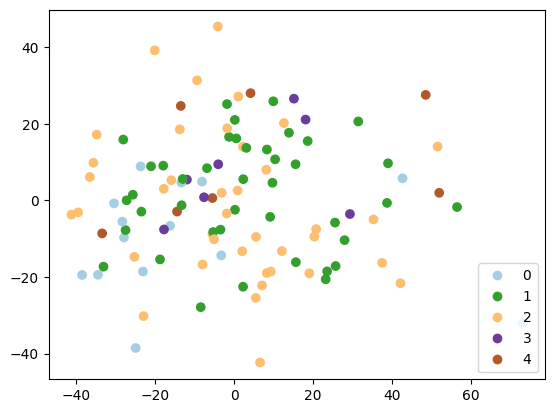

In [5]:
"""PCA on val data."""
fig, ax = plt.subplots()
pca_x_val = PCA(n_components=2).fit_transform(x_val)
scatter = ax.scatter(pca_x_val[:, 0], pca_x_val[:, 1],
                     c=y_val, cmap=plt.cm.Paired)
ax.legend(*scatter.legend_elements(), loc="lower right")
plt.show()


In [6]:
"""PCA explained variance."""
n_components = [2**i for i in range(9)]

for n_comp in n_components:
    pca = PCA(n_components=n_comp)
    pca.fit(x_trn)
    print(f"[{n_comp:03}] {sum(pca.explained_variance_ratio_):.4f}")

[001] 0.2893
[002] 0.3807
[004] 0.4982
[008] 0.6549
[016] 0.7946
[032] 0.9058
[064] 0.9709
[128] 0.9957
[256] 0.9998


In [7]:
"""t-SNE on train data."""
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(x_trn)

df = pd.DataFrame([tsne_results[:,0], tsne_results[:,1], y_trn]).T

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 440 samples in 0.001s...
[t-SNE] Computed neighbors for 440 samples in 0.123s...
[t-SNE] Computed conditional probabilities for sample 440 / 440
[t-SNE] Mean sigma: 17.336091
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.693378
[t-SNE] KL divergence after 300 iterations: 1.064579


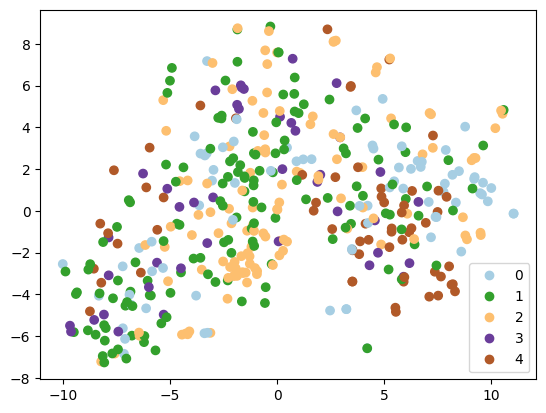

In [8]:
fig, ax = plt.subplots()
scatter = ax.scatter(tsne_results[:, 0], tsne_results[:, 1],
                     c=y_trn, cmap=plt.cm.Paired)
ax.legend(*scatter.legend_elements(), loc="lower right")
plt.show()

In [9]:
"""Write data to disk."""

embeddings = {"x_trn": x_trn,
              "y_trn": y_trn,
              "x_val": x_val,
              "y_val": y_val}
torch.save(embeddings, DATA_PATH + "embeddings/x_y_trn_val.pt")